In [1]:
# Claire Ardern 
# Intro to Machine Learning - Homework 5
# Pytorch and Neural Networks
# 11/21/2022

In [2]:
import numpy as np
import torch
import torch.optim as optim
import torch.nn as nn
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import OrderedDict
import time as time
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [3]:
######################
##### PROBLEM 1 ######
######################

t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

t_un = 0.1 * t_u

In [4]:
# Recreating the model discussed in lecture. A linear relationship between t_u and t_c.

def model_linear(t_u, w, b):
    return w*t_u + b

In [5]:
# Modifying the model discussed in lecture. A non-linear relationship between t_u and t_c.

def model(t_u, w2, w1, b):
    return w2*t_u**2 + w1*t_u + b

In [6]:
# Recreating the average loss function discussed in lecture. Works for both linear and non-linear models.

def loss_fn(t_p, t_c): 
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [7]:
# Recreating the training loop discussed in lecture. Uses a linear model.

def training_loop_linear(n_epochs, optimizer, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        t_p = model_linear(t_u, *params)
        loss = loss_fn(t_p, t_c)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
    
    return params

In [8]:
# Modifying the training loop discussed in lecture. Uses a non-linear model.

def training_loop(n_epochs, optimizer, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
    
    return params

In [9]:
# Training (1) with learning rate = 0.01

params = torch.tensor([1.0, 1.0, 0.0], requires_grad = True)
learning_rate = 0.01
optimizer = optim.SGD([params], lr = learning_rate)

training_loop(n_epochs = 5000, optimizer = optimizer, params = params, t_u = t_un, t_c = t_c)

Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan


tensor([nan, nan, nan], requires_grad=True)

In [10]:
# Training (2) with learning rate = 0.001

params = torch.tensor([1.0, 1.0, 0.0], requires_grad = True)
learning_rate = 0.001
optimizer = optim.SGD([params], lr = learning_rate)

training_loop(n_epochs = 5000, optimizer = optimizer, params = params, t_u = t_un, t_c = t_c)

Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan


tensor([nan, nan, nan], requires_grad=True)

In [11]:
# Training (3) with learning rate = 0.0001

params = torch.tensor([1.0, 1.0, 0.0], requires_grad = True)
learning_rate = 0.0001
optimizer = optim.SGD([params], lr = learning_rate)

training_loop(n_epochs = 5000, optimizer = optimizer, params = params, t_u = t_un, t_c = t_c)

Epoch 500, Loss 10.708596
Epoch 1000, Loss 8.642083
Epoch 1500, Loss 7.171005
Epoch 2000, Loss 6.123477
Epoch 2500, Loss 5.377227
Epoch 3000, Loss 4.845285
Epoch 3500, Loss 4.465788
Epoch 4000, Loss 4.194724
Epoch 4500, Loss 4.000802
Epoch 5000, Loss 3.861744


tensor([ 0.5570, -0.8881, -0.8753], requires_grad=True)

In [12]:
# Training (4) with learning rate = 0.0005

params = torch.tensor([1.0, 1.0, 0.0], requires_grad = True)
learning_rate = 0.0005
optimizer = optim.SGD([params], lr = learning_rate)

best_model_params = training_loop(n_epochs = 5000, optimizer = optimizer, params = params, t_u = t_un, t_c = t_c)

Epoch 500, Loss 5.380124
Epoch 1000, Loss 3.861909
Epoch 1500, Loss 3.570068
Epoch 2000, Loss 3.501500
Epoch 2500, Loss 3.473751
Epoch 3000, Loss 3.453630
Epoch 3500, Loss 3.435097
Epoch 4000, Loss 3.417055
Epoch 4500, Loss 3.399295
Epoch 5000, Loss 3.381780


In [13]:
# Recreating the model discussed in lecture. Uses a linear model with learning rate = 1e-2

params = torch.tensor([1.0, 0.0], requires_grad = True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr = learning_rate)

linear_model_params = training_loop_linear(n_epochs = 5000, optimizer = optimizer, params = params, t_u = t_un, t_c = t_c)

Epoch 500, Loss 7.860115
Epoch 1000, Loss 3.828538
Epoch 1500, Loss 3.092191
Epoch 2000, Loss 2.957698
Epoch 2500, Loss 2.933134
Epoch 3000, Loss 2.928648
Epoch 3500, Loss 2.927830
Epoch 4000, Loss 2.927679
Epoch 4500, Loss 2.927652
Epoch 5000, Loss 2.927647


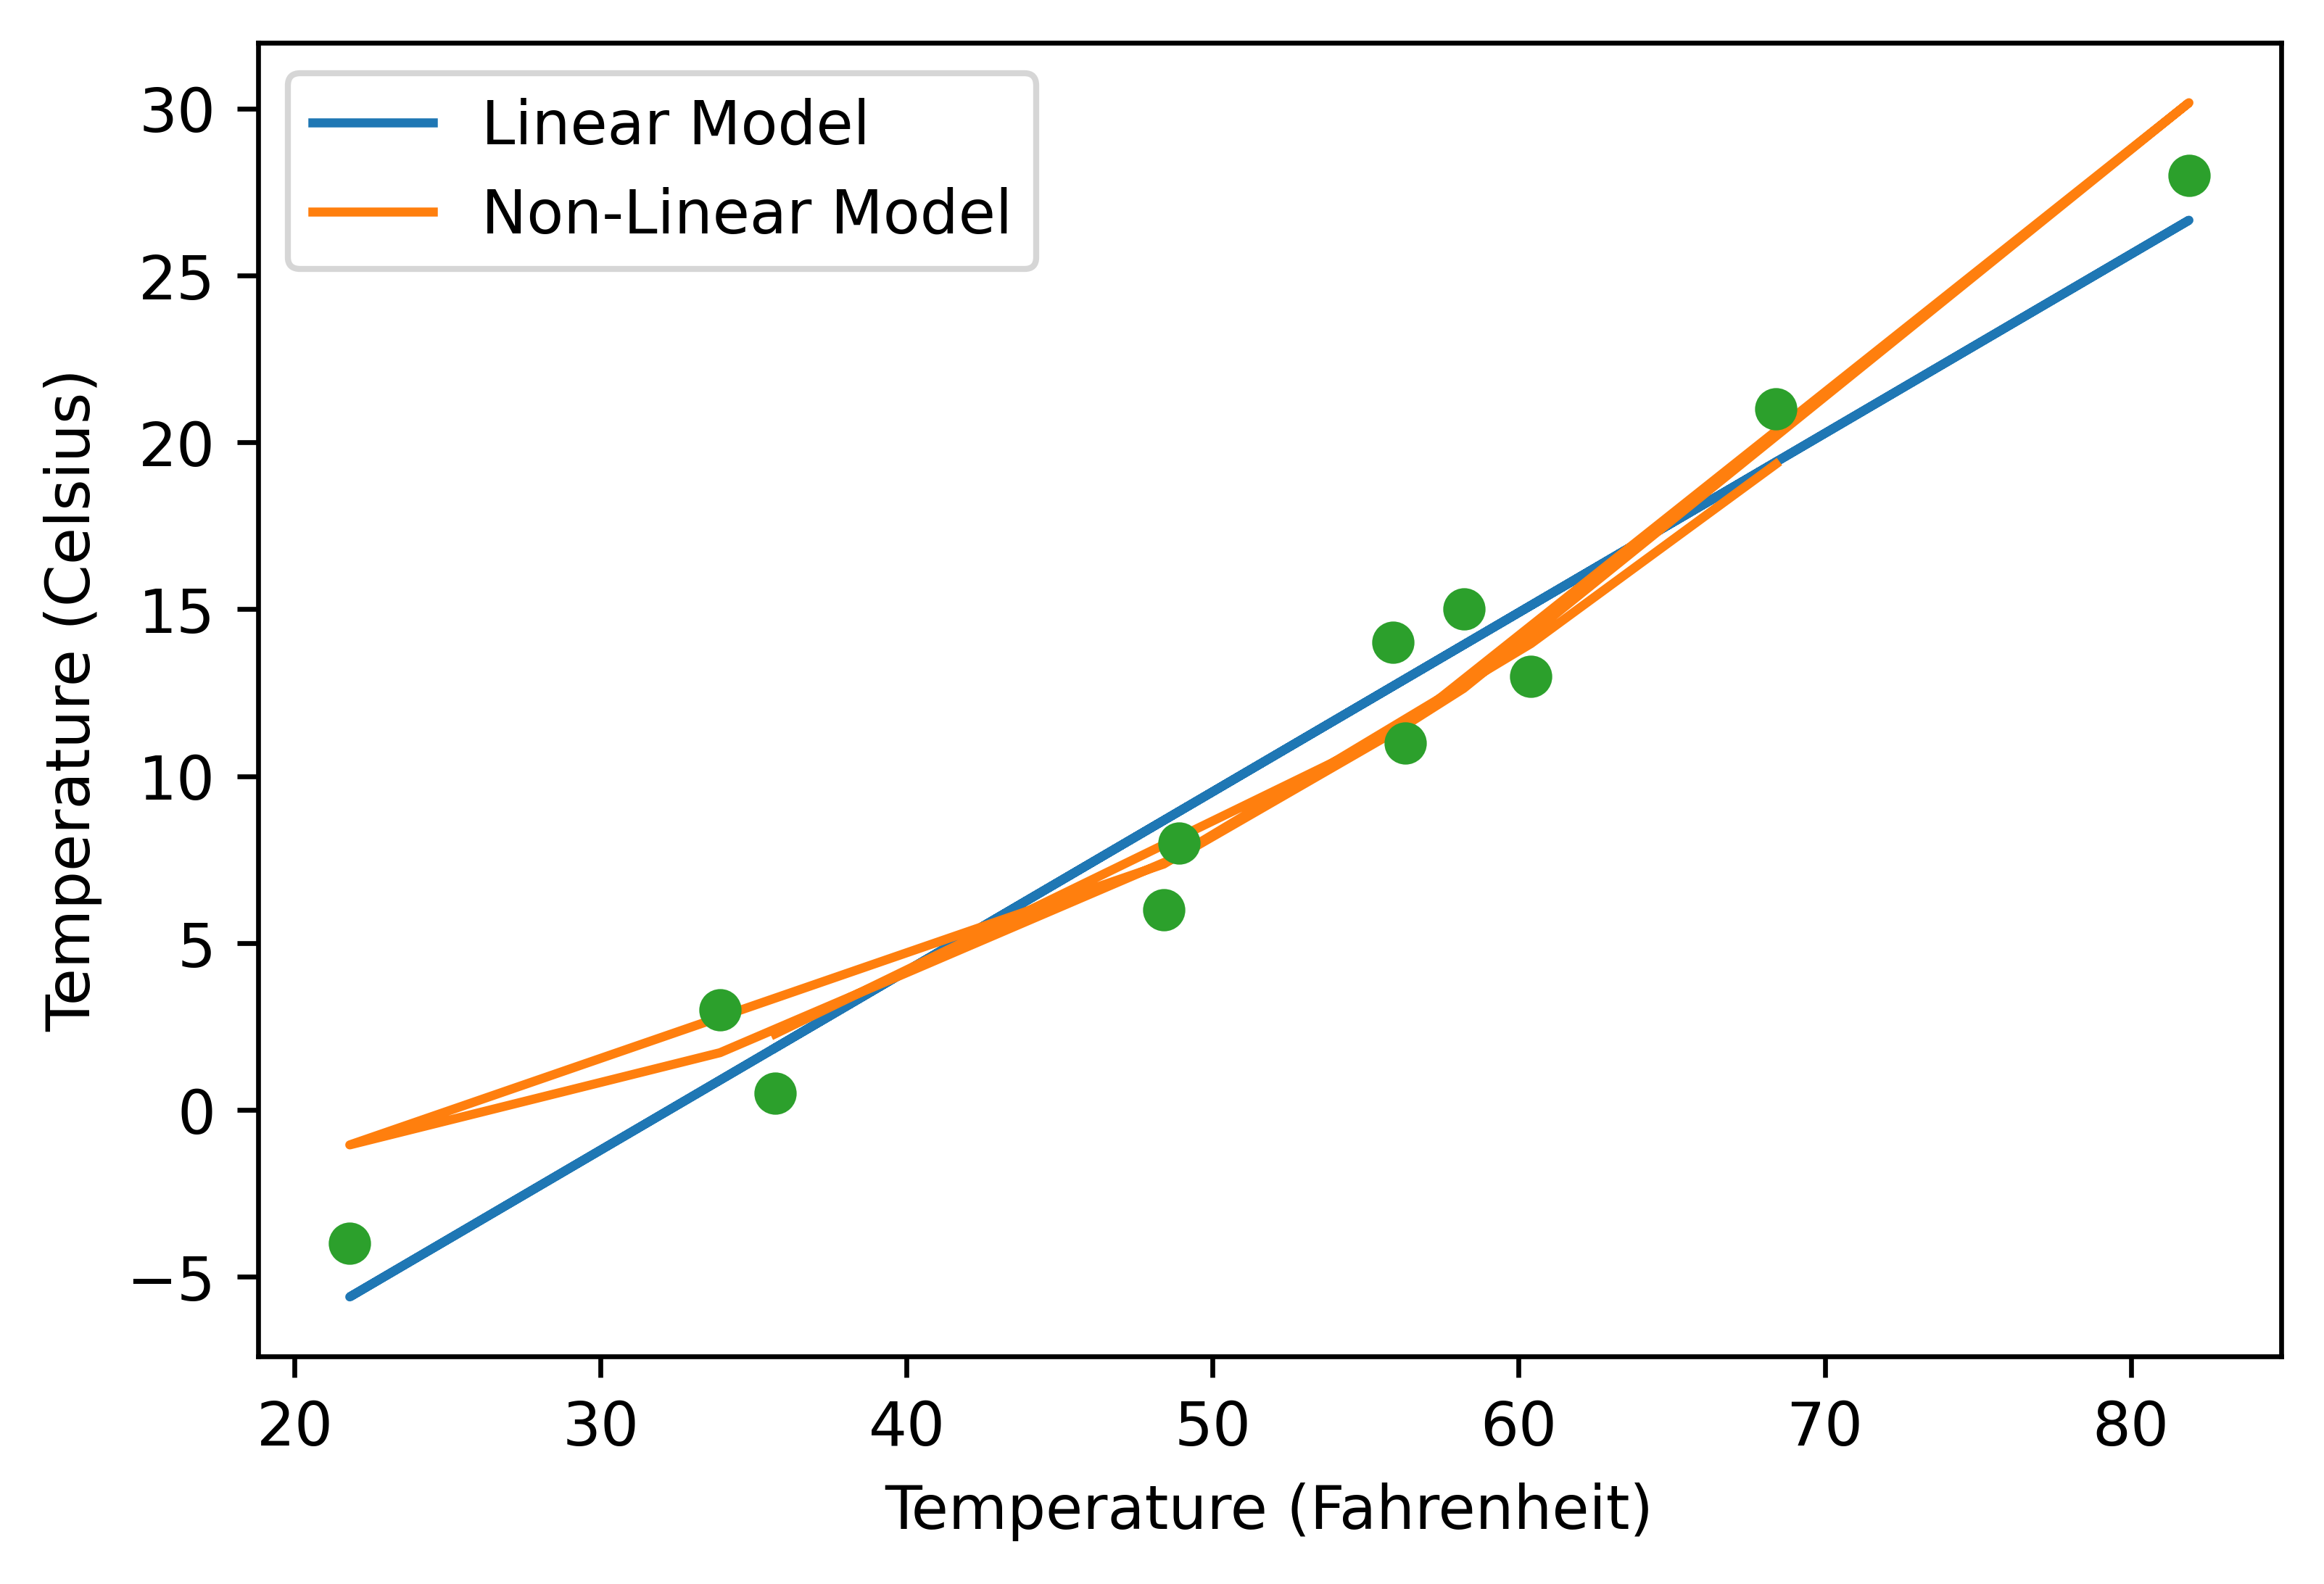

In [14]:
# Visualizing the non-linear model against the linear model over the input dataset

t_p1 = model_linear(t_un, *linear_model_params)
t_p2 = model(t_un, *best_model_params)

fig = plt.figure(dpi=600)
plt.xlabel("Temperature (Fahrenheit)")
plt.ylabel("Temperature (Celsius)")
plt.plot(t_u.numpy(), t_p1.detach().numpy(), label = "Linear Model")
plt.plot(t_u.numpy(), t_p2.detach().numpy(), label = "Non-Linear Model")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.legend()

In [15]:
######################
##### PROBLEM 2 ######
######################

# Reading in data file
HData = pd.read_csv('./Housing.csv')

# Converting binary data to numerical representation
# (Even though we aren't using these columns, we have to do this for the train-test split to work) 
HData.mainroad.replace(('yes', 'no'), (1, 0), inplace=True)
HData.guestroom.replace(('yes', 'no'), (1, 0), inplace=True)
HData.basement.replace(('yes', 'no'), (1, 0), inplace=True)
HData.hotwaterheating.replace(('yes', 'no'), (1, 0), inplace=True)
HData.airconditioning.replace(('yes', 'no'), (1, 0), inplace=True)
HData.prefarea.replace(('yes', 'no'), (1, 0), inplace=True)
HData.furnishingstatus.replace(('furnished', 'semi-furnished', 'unfurnished'), (2, 1, 0), inplace=True)

# Dividing provided data into Training Set (80%) and Validation Set (20%)
HData_train, HData_val = train_test_split(HData, train_size =  0.8, test_size = 0.2)

# Standardizing data
HData_train = pd.DataFrame(StandardScaler().fit_transform(HData_train), columns= HData_train.columns, index= HData_train.index)
HData_val = pd.DataFrame(StandardScaler().fit_transform(HData_val), columns= HData_val.columns, index= HData_val.index)

# Creating a tensor for each input and output
train_X1 = torch.tensor(HData_train.values[:,1])
train_X2 = torch.tensor(HData_train.values[:,2])
train_X3 = torch.tensor(HData_train.values[:,3])
train_X4 = torch.tensor(HData_train.values[:,4])
train_X5 = torch.tensor(HData_train.values[:,10])
train_U = torch.tensor(HData_train.values[:,0])

val_X1 = torch.tensor(HData_val.values[:,1])
val_X2 = torch.tensor(HData_val.values[:,2])
val_X3 = torch.tensor(HData_val.values[:,3])
val_X4 = torch.tensor(HData_val.values[:,4])
val_X5 = torch.tensor(HData_val.values[:,10])
val_U = torch.tensor(HData_val.values[:,0])

In [16]:
# Modifying the model discussed in lecture. A linear relationship with six parameters.

def model_sixpar(X5, X4, X3, X2, X1, w5, w4, w3, w2, w1, b):
    return w5*X5 + w4*X4 + w3*X3 + w2*X2 + w1*X1 + b

In [17]:
# Modifying the training loop discussed in lecture. Uses a linear model with six parameters.

def training_loop_linreg(n_epochs, optimizer, params, train_X5, train_X4, train_X3, train_X2, train_X1, train_U, 
                                                        val_X5, val_X4, val_X3, val_X2, val_X1, val_U):
    for epoch in range(1, n_epochs + 1):
        train_p_p = model_sixpar(train_X5, train_X4, train_X3, train_X2, train_X1, *params)
        train_loss = loss_fn(train_p_p, train_U)
        
        with torch.no_grad():
            val_p_p = model_sixpar(val_X5, val_X4, val_X3, val_X2, val_X1, *params)
            val_loss = loss_fn(val_p_p, val_U)
            assert val_loss.requires_grad == False
        
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        
        if epoch % 500 == 0:
            print(f"Epoch: {epoch}, Training Loss: {train_loss.item():.4f},"
                  f"  Validation Loss: {val_loss.item():.4f}")
            print('Evaluation Accuracy (MSE): {}'.format(mean_squared_error(val_p_p.detach().numpy(), val_U.detach().numpy())))
    
    return params

In [18]:
# Training (1) with learning rate = 0.01

params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad = True)
learning_rate = 0.01
optimizer = optim.SGD([params], lr = learning_rate)

training_loop_linreg(n_epochs = 5000, optimizer = optimizer, params = params, train_X5 = train_X5, train_X4 = train_X4, 
                                             train_X3 = train_X3, train_X2 = train_X2, train_X1 = train_X1, 
                                             train_U = train_U, val_X5 = val_X5, val_X4 = val_X4, val_X3 = val_X3, 
                                             val_X2 = val_X2, val_X1 = val_X1, val_U = val_U)

Epoch: 500, Training Loss: 0.4290,  Validation Loss: 0.4846
Evaluation Accuracy (MSE): 0.4846404993528042
Epoch: 1000, Training Loss: 0.4290,  Validation Loss: 0.4847
Evaluation Accuracy (MSE): 0.4847447716104217
Epoch: 1500, Training Loss: 0.4290,  Validation Loss: 0.4847
Evaluation Accuracy (MSE): 0.48474495202105955
Epoch: 2000, Training Loss: 0.4290,  Validation Loss: 0.4847
Evaluation Accuracy (MSE): 0.48474495202105955
Epoch: 2500, Training Loss: 0.4290,  Validation Loss: 0.4847
Evaluation Accuracy (MSE): 0.48474495202105955
Epoch: 3000, Training Loss: 0.4290,  Validation Loss: 0.4847
Evaluation Accuracy (MSE): 0.48474495202105955
Epoch: 3500, Training Loss: 0.4290,  Validation Loss: 0.4847
Evaluation Accuracy (MSE): 0.48474495202105955
Epoch: 4000, Training Loss: 0.4290,  Validation Loss: 0.4847
Evaluation Accuracy (MSE): 0.48474495202105955
Epoch: 4500, Training Loss: 0.4290,  Validation Loss: 0.4847
Evaluation Accuracy (MSE): 0.48474495202105955
Epoch: 5000, Training Loss: 0.4

tensor([1.7589e-01, 2.5355e-01, 3.2029e-01, 3.9371e-02, 3.9982e-01, 1.9429e-16],
       requires_grad=True)

In [19]:
# Training (2) with learning rate = 0.001

params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad = True)
learning_rate = 0.001
optimizer = optim.SGD([params], lr = learning_rate)

training_loop_linreg(n_epochs = 5000, optimizer = optimizer, params = params, train_X5 = train_X5, train_X4 = train_X4, 
                                             train_X3 = train_X3, train_X2 = train_X2, train_X1 = train_X1, 
                                             train_U = train_U, val_X5 = val_X5, val_X4 = val_X4, val_X3 = val_X3, 
                                             val_X2 = val_X2, val_X1 = val_X1, val_U = val_U)

Epoch: 500, Training Loss: 0.5610,  Validation Loss: 0.6096
Evaluation Accuracy (MSE): 0.6096263273294392
Epoch: 1000, Training Loss: 0.4353,  Validation Loss: 0.4836
Evaluation Accuracy (MSE): 0.48357066116689584
Epoch: 1500, Training Loss: 0.4301,  Validation Loss: 0.4805
Evaluation Accuracy (MSE): 0.480497643481834
Epoch: 2000, Training Loss: 0.4293,  Validation Loss: 0.4817
Evaluation Accuracy (MSE): 0.48174327611149276
Epoch: 2500, Training Loss: 0.4291,  Validation Loss: 0.4829
Evaluation Accuracy (MSE): 0.48290859461687613
Epoch: 3000, Training Loss: 0.4290,  Validation Loss: 0.4837
Evaluation Accuracy (MSE): 0.4836779709025493
Epoch: 3500, Training Loss: 0.4290,  Validation Loss: 0.4841
Evaluation Accuracy (MSE): 0.4841389474708656
Epoch: 4000, Training Loss: 0.4290,  Validation Loss: 0.4844
Evaluation Accuracy (MSE): 0.48440424071256366
Epoch: 4500, Training Loss: 0.4290,  Validation Loss: 0.4846
Evaluation Accuracy (MSE): 0.48455421915810426
Epoch: 5000, Training Loss: 0.4290

tensor([1.7609e-01, 2.5340e-01, 3.2000e-01, 3.9779e-02, 3.9965e-01, 1.9424e-16],
       requires_grad=True)

In [20]:
# Training (3) with learning rate = 0.0001

params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad = True)
learning_rate = 0.0001
optimizer = optim.SGD([params], lr = learning_rate)

training_loop_linreg(n_epochs = 5000, optimizer = optimizer, params = params, train_X5 = train_X5, train_X4 = train_X4, 
                                             train_X3 = train_X3, train_X2 = train_X2, train_X1 = train_X1, 
                                             train_U = train_U, val_X5 = val_X5, val_X4 = val_X4, val_X3 = val_X3, 
                                             val_X2 = val_X2, val_X1 = val_X1, val_U = val_U)

Epoch: 500, Training Loss: 4.2870,  Validation Loss: 4.3004
Evaluation Accuracy (MSE): 4.300351863640395
Epoch: 1000, Training Loss: 3.0582,  Validation Loss: 3.0860
Evaluation Accuracy (MSE): 3.0860314347788633
Epoch: 1500, Training Loss: 2.2229,  Validation Loss: 2.2597
Evaluation Accuracy (MSE): 2.259674657464745
Epoch: 2000, Training Loss: 1.6547,  Validation Loss: 1.6969
Evaluation Accuracy (MSE): 1.6969482275032002
Epoch: 2500, Training Loss: 1.2679,  Validation Loss: 1.3134
Evaluation Accuracy (MSE): 1.3134346034969409
Epoch: 3000, Training Loss: 1.0045,  Validation Loss: 1.0518
Evaluation Accuracy (MSE): 1.05179858564164
Epoch: 3500, Training Loss: 0.8249,  Validation Loss: 0.8731
Evaluation Accuracy (MSE): 0.8730907193350391
Epoch: 4000, Training Loss: 0.7022,  Validation Loss: 0.7509
Evaluation Accuracy (MSE): 0.7508509867198707
Epoch: 4500, Training Loss: 0.6184,  Validation Loss: 0.6671
Evaluation Accuracy (MSE): 0.6670910315742402
Epoch: 5000, Training Loss: 0.5610,  Valid

tensor([3.6605e-01, 3.5359e-01, 3.5086e-01, 2.1563e-01, 4.6718e-01, 1.5069e-16],
       requires_grad=True)

In [21]:
# Training (4) with learning rate = 0.0005

params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad = True)
learning_rate = 0.0005
optimizer = optim.SGD([params], lr = learning_rate)

training_loop_linreg(n_epochs = 5000, optimizer = optimizer, params = params, train_X5 = train_X5, train_X4 = train_X4, 
                                             train_X3 = train_X3, train_X2 = train_X2, train_X1 = train_X1, 
                                             train_U = train_U, val_X5 = val_X5, val_X4 = val_X4, val_X3 = val_X3, 
                                             val_X2 = val_X2, val_X1 = val_X1, val_U = val_U)

Epoch: 500, Training Loss: 1.2692,  Validation Loss: 1.3147
Evaluation Accuracy (MSE): 1.3147454401368985
Epoch: 1000, Training Loss: 0.5610,  Validation Loss: 0.6096
Evaluation Accuracy (MSE): 0.6096009097451207
Epoch: 1500, Training Loss: 0.4534,  Validation Loss: 0.5015
Evaluation Accuracy (MSE): 0.5014538004570578
Epoch: 2000, Training Loss: 0.4353,  Validation Loss: 0.4836
Evaluation Accuracy (MSE): 0.48358239488809013
Epoch: 2500, Training Loss: 0.4313,  Validation Loss: 0.4806
Evaluation Accuracy (MSE): 0.4805937258722192
Epoch: 3000, Training Loss: 0.4301,  Validation Loss: 0.4805
Evaluation Accuracy (MSE): 0.48049987031780417
Epoch: 3500, Training Loss: 0.4295,  Validation Loss: 0.4811
Evaluation Accuracy (MSE): 0.48106403327993935
Epoch: 4000, Training Loss: 0.4293,  Validation Loss: 0.4817
Evaluation Accuracy (MSE): 0.4817434933015321
Epoch: 4500, Training Loss: 0.4291,  Validation Loss: 0.4824
Evaluation Accuracy (MSE): 0.48237452349445364
Epoch: 5000, Training Loss: 0.4291

tensor([1.8141e-01, 2.5258e-01, 3.1347e-01, 4.5969e-02, 3.9603e-01, 1.9429e-16],
       requires_grad=True)

In [22]:
######################
##### PROBLEM 3 ######
######################

# Combining the 5 input tensors into one input tensor
x_train = torch.stack((train_X5, train_X4, train_X3, train_X2, train_X1))
x_val = torch.stack((val_X5, val_X4, val_X3, val_X2, val_X1))

x_train = torch.transpose(x_train, 0, 1)
x_val = torch.transpose(x_val, 0, 1)

train_U = torch.tensor(train_U).unsqueeze(1)
val_U = torch.tensor(val_U).unsqueeze(1)

x_train = x_train.to(torch.float32)
x_val = x_val.to(torch.float32)
train_U = train_U.to(torch.float32)
val_U = val_U.to(torch.float32)


C:\Users\user\AppData\Local\Temp\ipykernel_14644\2128272570.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_U = torch.tensor(train_U).unsqueeze(1)
C:\Users\user\AppData\Local\Temp\ipykernel_14644\2128272570.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_U = torch.tensor(val_U).unsqueeze(1)


In [23]:
# Recreating the model discussed in lecture. Rebuilding the training loop with nn model

def training_loop_nn(n_epochs, optimizer, model, loss_fn, x_train, x_val, train_U, val_U, epochs, train_loss, val_loss):
    t0 = time.time()
    correct = 0
    for epoch in range(1, n_epochs + 1):
                
        p_p_train = model(x_train)
        loss_train = loss_fn(p_p_train, train_U)
        
        p_p_val = model(x_val)
        loss_val = loss_fn(p_p_val, val_U)
    
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
        
        epochs.append(epoch)
        train_loss.append(loss_train.item())
        val_loss.append(loss_val.item())

    if epoch == 200:
        print('Training complete. Duration: {} seconds'.format(time.time() - t0))
        print(f"Epoch {epoch}, Training Loss: {loss_train.item():.4f},"
              f"  Validation Loss:{loss_val.item():.4f}")
        print('Evaluation Accuracy (MSE): {}'.format(mean_squared_error(p_p_val.detach().numpy(), val_U.detach().numpy())))


In [24]:
# (3a) Defining the nn model as a nn single layer linear model with 8 nodes

a_epochs = []
a_train_loss = []
a_val_loss = []

seq_model = nn.Sequential(OrderedDict([('hidden_linear', nn.Linear(5,8)),
                                       ('hidden_activation', nn.Tanh()),
                                       ('output_linear',nn.Linear(8,1))]))

optimizer = optim.SGD(seq_model.parameters(), lr = 1e-3)

training_loop_nn(n_epochs = 200, optimizer = optimizer, model = seq_model, loss_fn = nn.MSELoss(), x_train = x_train,
                                                                 x_val = x_val, train_U = train_U, val_U = val_U, 
                                                                 epochs = a_epochs, train_loss = a_train_loss, 
                                                                 val_loss = a_val_loss)


Training complete. Duration: 0.1499180793762207 seconds
Epoch 200, Training Loss: 0.8046,  Validation Loss:0.8070
Evaluation Accuracy (MSE): 0.8070147037506104


In [26]:
# (3b) Defining the nn model as a nn three layer linear model with 8 nodes

b_epochs = []
b_train_loss = []
b_val_loss = []

seq_model = nn.Sequential(OrderedDict([('hidden_linear1', nn.Linear(5,8)),
                                       ('hidden_activation1', nn.Tanh()),
                                       ('output_linear1',nn.Linear(8,6)),
                                      
                                      ('hidden_linear2', nn.Linear(6,4)),
                                       ('hidden_activation2', nn.Tanh()),
                                       ('output_linear2',nn.Linear(4,2)),
                                       
                                      ('hidden_linear3', nn.Linear(2,1)),
                                       ('hidden_activation3', nn.Tanh()),
                                       ('output_linear3',nn.Linear(1,1))]))

optimizer = optim.SGD(seq_model.parameters(), lr = 1e-3)

training_loop_nn(n_epochs = 200, optimizer = optimizer, model = seq_model, loss_fn = nn.MSELoss(), x_train = x_train,
                                                                 x_val = x_val, train_U = train_U, val_U = val_U,
                                                                 epochs = a_epochs, train_loss = a_train_loss, 
                                                                 val_loss = a_val_loss)

Training complete. Duration: 0.24983668327331543 seconds
Epoch 200, Training Loss: 1.0321,  Validation Loss:1.0316
Evaluation Accuracy (MSE): 1.031635046005249


<function matplotlib.pyplot.show(close=None, block=None)>

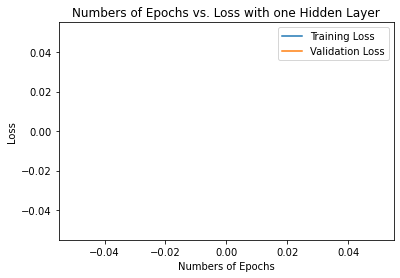

In [27]:
# Vizualize the model created in 3b against the baseline implementation in Problem 1

plt.figure(1)
plt.plot(b_epochs, b_train_loss, label = "Training Loss")
plt.plot(b_epochs, b_val_loss, label = "Validation Loss")
plt.xlabel("Numbers of Epochs")
plt.ylabel("Loss")
plt.title("Numbers of Epochs vs. Loss with one Hidden Layer")
plt.legend()
plt.show